In [1]:
from PIL import Image

In [3]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [2]:
! wget https://raw.githubusercontent.com/jonkrohn/DLTFpT/master/notebooks/oboe-with-book.jpg

zsh:1: command not found: wget


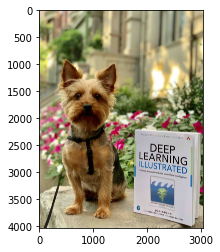

In [5]:
img = Image.open("/Users/vrbabu/Documents/code/udemy_ml_math_python/ml_math_python/oboe-with-book.jpeg")

plt.imshow(img)

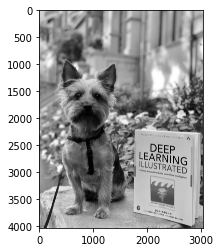

In [6]:
# convert to grayscale for simplicity
imggray = img.convert('LA')
plt.imshow(imggray)

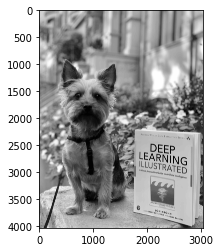

In [10]:
# Convert image into numpy matrix
imgmat = np.array(imggray.getdata(band=0), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

plt.imshow(imgmat, cmap='gray')

In [11]:
# Calculate SVD of image
U, sigma, V = np.linalg.svd(imgmat)

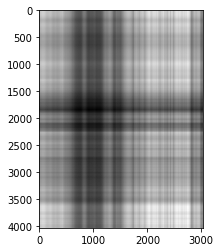

In [13]:
# reconstitude image with only first right-singular and left-singular vectors
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])

plt.imshow(reconstimg, cmap='gray')

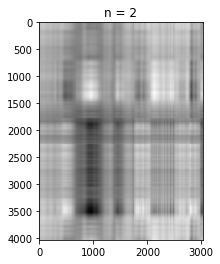

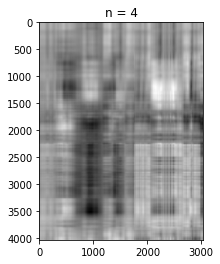

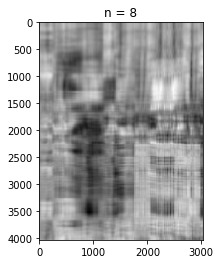

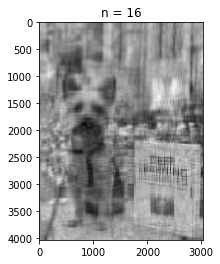

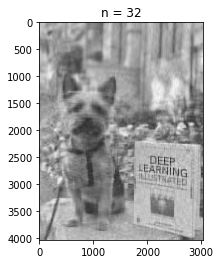

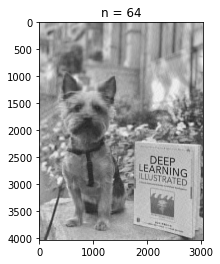

In [14]:
# Add additional singular vectors to improve image quality
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    _ = plt.imshow(reconstimg, cmap='gray')

    plt.title(f"n = {i}")
    plt.show()

In [16]:
# Original Image
imgmat.shape

(4032, 3024)

In [18]:
full_representation = 4032 * 3024
full_representation

12192768

In [20]:
svd64_rep = 64*4032 + 64*3024
svd64_rep 

451584

In [21]:
svd64_rep/full_representation

0.037037037037037035